"""
Reconstruct retardance and orientation maps from images taken with different polarized illumination output
by Open PolScope. This script using the 4- or 5-frame reconstruction algorithm described in Michael Shribak and 
Rudolf Oldenbourg, 2003.

by Syuan-Ming Guo @ CZ Biohub 2018.3.30 
"""

In [1]:
%matplotlib inline
from PolScope.multiPos import findBackground
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import re

from utils.imgIO import GetSubDirName, ParseTiffInput
from PolScope.reconstruct import computeAB, correctBackground, computeDeltaPhi
from utils.plotting import plot_birefringence, plot_sub_images

sns.set_context("poster")

In [2]:
def processImg(ImgSmPath, ImgBgPath, Chi):
    Abg, Bbg, IAbsBg, DAPIBg, TdTomatoBg = findBackground(ImgSmPath, ImgBgPath, Chi) # find background tile
    loopPos(ImgSmPath, Chi, Abg, Bbg, IAbsBg, DAPIBg, TdTomatoBg)

def loopPos(ImgSmPath, Chi, Abg, Bbg, IAbsBg, DAPIBg, TdTomatoBg): # loop through each position in the acquistion folder       
    subDirName = GetSubDirName(ImgSmPath)           
    ind = 0
    for subDir in subDirName:
        plt.close("all") # close all the figures from the last run (for running in Spyder)
        acquDirPath = os.path.join(ImgSmPath, subDir)
        if re.match( r'(\d?)-?Pos_?(\d+)_?(\d?)', subDir, re.M|re.I):          
            ImgRawSm, retardMMSm, azimuthMMSm, ImgFluor = ParseTiffInput(acquDirPath)    
            ASm, BSm, IAbsSm = computeAB(ImgRawSm, Chi)        
            A, B = correctBackground(ASm,BSm,Abg,Bbg, ImgRawSm, extra=False)
#            IAbsSm = IAbsSm/IAbsBg
            retard, azimuth = computeDeltaPhi(A,B)        
#             retard = removeBubbles(retard) # remove bright speckles in mounted brain slice images     
            retardBg, azimuthBg = computeDeltaPhi(Abg, Bbg)
            if ImgFluor.size:            
                DAPI = ImgFluor[:,:,0]/DAPIBg # Needs to be generalized in the future
                TdTomato = ImgFluor[:,:,1]/TdTomatoBg  # Needs to be generalized in the future
            else:
                DAPI = np.array([])
                TdTomato = np.array([])
            titles = ['Retardance (MM)','Orientation (MM)','Retardance (Py)','Orientation (Py)']
            images = [retardMMSm, azimuthMMSm,retard, azimuth]
            plot_sub_images(images,titles)
            plt.show()
            plt.savefig(os.path.join(acquDirPath,'compare_MM_Py.png'),dpi=200,bbox_inches='tight')    
            plot_birefringence(IAbsSm,retard, azimuth, acquDirPath, ind, DAPI=DAPI,
                               TdTomato=TdTomato, spacing=6, vectorScl=0.5, zoomin=False, dpi=300)
            ind+=1
        
    


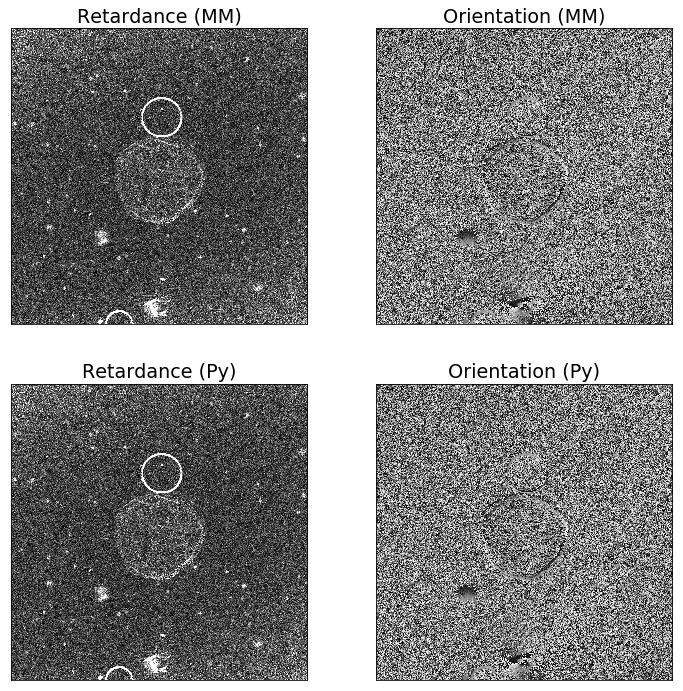

<Figure size 432x288 with 0 Axes>

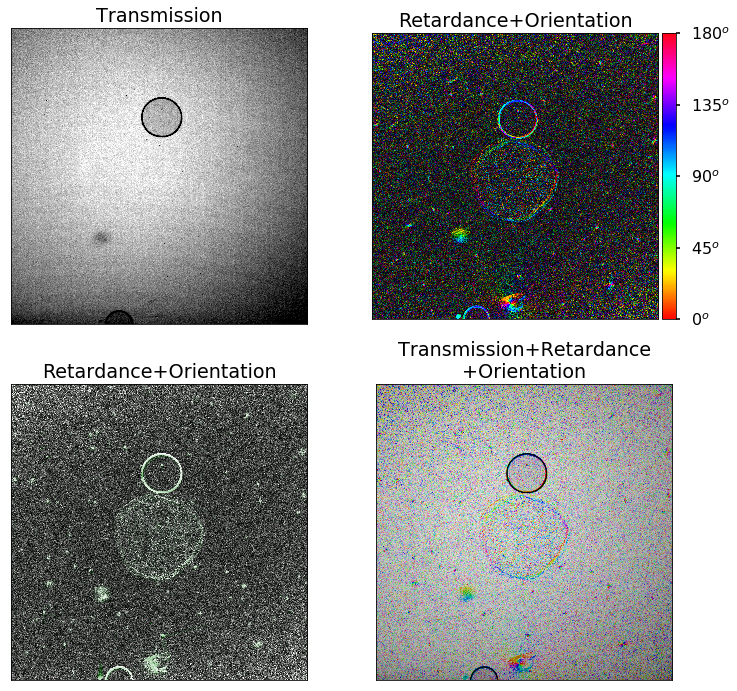

In [3]:
#%%
figPath = 'C:/Google Drive/Python/figures/'   # change 'fig_path' to the desired figure output path.
#ImgSmPath = 'C:/Google Drive/20180314_GreenbergLabBrainSlice/SM_2018_0314_1550_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/20180314_GreenbergLabBrainSlice/BG_2018_0314_1548_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/20180314_GreenbergLabBrainSlice/SM_2018_0314_1558_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/20180314_GreenbergLabBrainSlice/BG_2018_0314_1555_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/20180328_GreenbergLabBrainSlice/SM_2018_0328_1418_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/20180328_GreenbergLabBrainSlice/BG_2018_0328_1338_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/2018_04_02_Grinberg_Slice484_4x20x/SM_2018_0402_1325_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/2018_04_02_Grinberg_Slice484_4x20x/BG_2018_0402_1312_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/2018_04_02_Grinberg_Slice484_4x20x/SM_2018_0402_1256_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/2018_04_02_Grinberg_Slice484_4x20x/BG_2018_0402_1246_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/2018_04_04_UstainedTissue_4x/SM_2018_0404_1816_1' # Sample image folder path
#ImgSmPath = 'C:/Google Drive/2018_04_04_UstainedTissue_4x/SM_2018_0404_1817_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/2018_04_04_UstainedTissue_4x/BG_2018_0404_1811_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/2018_04_12_U2OSCells63x1.2/SM_2018_0412_1731_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/2018_04_12_U2OSCells63x1.2/BG_2018_0412_1726_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/2018_04_12_U2OSCells63x1.2/SMS_2018_0412_1735_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/2018_04_12_U2OSCells63x1.2/BG_2018_0412_1726_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/2018_04_18_mus_anterior_1/SM_2018_0418_1753_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/2018_04_18_mus_anterior_1/BG_2018_0418_1751_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/2018_04_16_unstained_brain_slice/SMS_2018_0416_1825_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/2018_04_16_unstained_brain_slice/BG_2018_0416_1745_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/NikonSmallWorld/someone/2018_04_25_Testing/SMS_2018_0425_1654_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/NikonSmallWorld/someone/2018_04_25_Testing/BG_2018_0425_1649_1' # Background image folder path
ImgSmPath = 'C:/Google Drive/20180530_gutCells/SM_2018_0530_1623_1' # Sample image folder path
ImgBgPath = 'C:/Google Drive/20180530_gutCells/BG_2018_0530_1621_1' # Background image folder path
# ImgSmPath = 'C:/Google Drive/20180530_gutCells/SM_2018_0530_1812_1' # Sample image folder path
# ImgBgPath = 'C:/Google Drive/20180530_gutCells/BG_2018_0530_1707_1' # Background image folder path
#ImgSmPath = 'C:/Google Drive/2018_05_09_KindneySection/SM_2018_0509_1804_1' # Sample image folder path
#ImgBgPath = 'C:/Google Drive/2018_05_09_KindneySection/BG_2018_0509_1801_1' # Background image folder path
Chi = 0.05 # Swing
#pixsize = 0.624414 # (um) calibrated pixel size of confocal Zyla at 10X
#pixsize = 0.624414 # (um) calibrated pixel size of confocal Zyla at 10X 
#spacing  = 10 # spacing for vector field map
#%%
processImg(ImgSmPath, ImgBgPath, Chi)